Πρόσφατες επιθέσεις, όπως εκείνη στον πάροχο DNS Dyn (<a href="https://en.wikipedia.org/wiki/DDoS_attack_on_Dyn">wiki</a>) αποδεικνύουν ότι ένα από τα σημαντικότερα προβλήματα που αντιμετωπίζει το σύγχρονο Διαδίκτυο είναι εκείνο των botnets. Σε αυτά, ένας επιτιθέμενος συγκεντρώνει την υπολογιστική ισχύ που του είναι απαραίτητη για την εκδήλωση επιθέσεων DDoS ή/και άλλων κακόβουλων δραστηριοτήτων εγκαθιστώντας λογισμικό σε μεγάλο πλήθος από υπολογιστές (bots) που έχουν κενά ασφαλείας (π.χ. συσκευές Internet of Things - IoT).

Οι μολυσμένοι υπολογιστές (bots) διατηρούν διαύλους επικοινωνίας με το διαχειριστή του botnet (Command & Control Server) με σκοπό να λαμβάνουν εντολές και να αποστέλλουν πληροφορίες. Για το σκοπό αυτό εκμεταλλεύονται καθιερωμένα πρωτόκολλα, όπως το DNS με την παραγωγή μεγάλου πλήθους από domain names μέσω Domain Generation Algorithms (DGA's) που αλλάζουν διαρκώς για την επικοινωνία του bot με το διαχειριστή του, ώστε να αποφεύγεται ο εντοπισμός του Command & Control Server.

Τα ονόματα DNS που χρησιμοποιούνται από αλγορίθμους DGA μπορεί να είναι είτε τυχαία αλφαριθμητικά (π.χ. asdfasjkdfh8oawher8has.com) ή συνδυασμοί τυχαίων λέξεων που έχουν ληφθεί από κάποιο λεξικό (π.χ. school-doctor.com). Χρησιμοποιείται ένας μεγάλος αριθμός από τέτοια ονόματα, η πλειοψηφία των οποίων δεν έχουν κάποια αντιστοίχιση σε διεύθυνση IP και στοχεύουν στην απόκρυψη του Command & Control Server, επειδή οι αμυνόμενοι καλούνται να ελέγξουν κάθε ένα από τα ονόματα που παρατηρούν στο δίκτυό τους, σπαταλώντας χρόνο και πόρους. Επιπρόσθετα, η διεύθυνση IP του Command & Control Server αλλάζει πολύ συχνά (πολλές φορές σε μία μέρα), ώστε να αποφεύγεται ο εντοπισμός του ακόμα και όταν εντοπίζονται τα ονόματα DGA που οδήγησαν σε αυτόν.

<img src="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab12/dga.png"></img>

<img src=""></img>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools

def CustomCmap(from_rgb,to_rgb):

    # from color r,g,b
    r1,g1,b1 = from_rgb

    # to color r,g,b
    r2,g2,b2 = to_rgb

    cdict = {'red': ((0, r1, r1),
                   (1, r2, r2)),
           'green': ((0, g1, g1),
                    (1, g2, g2)),
           'blue': ((0, b1, b1),
                   (1, b2, b2))}

    cmap = LinearSegmentedColormap('custom_cmap', cdict)
    return cmap

mycmap = CustomCmap([1.0, 1.0, 1.0], [72/255, 99/255, 147/255])
mycmap_r = CustomCmap([72/255, 99/255, 147/255], [1.0, 1.0, 1.0])

mycol = (72/255, 99/255, 147/255)
mycomplcol = (129/255, 143/255, 163/255)

def plot_cm(cfmatrix,title,classes):
    fig, ax1 = plt.subplots(1,1, figsize=(15,15)) #

    for ax,cm in zip([ax1],[cfmatrix]):
        im = ax.imshow(cm, interpolation='nearest', cmap=mycmap)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=.2)
        plt.colorbar(im, cax=cax) #, ticks=[-1,-0.5,0,0.5,1]
        ax.set_title(title,fontsize=14)
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=90)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)

        fmt = 'd'
        thresh = cm.max() / 2.

        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        ax.set_ylabel('True label',fontsize=14)
        ax.set_xlabel('Predicted label',fontsize=14)

    plt.savefig(title+'.pdf', bbox_inches='tight')
    plt.show()

Training for fold:  1
Epoch 1/5
625/625 [==============================] - 36s 56ms/step - loss: 1.4982 - accuracy: 0.5984
Epoch 2/5
625/625 [==============================] - 35s 56ms/step - loss: 0.9530 - accuracy: 0.7080
Epoch 3/5
625/625 [==============================] - 36s 57ms/step - loss: 0.7876 - accuracy: 0.7543
Epoch 4/5
625/625 [==============================] - 37s 58ms/step - loss: 0.7040 - accuracy: 0.7787
Epoch 5/5
625/625 [==============================] - 3s 5ms/step - loss: 0.5869 - accuracy: 0.8047
Score for fold 1: loss of 0.5868728756904602; accuracy of 80.47000169754028%


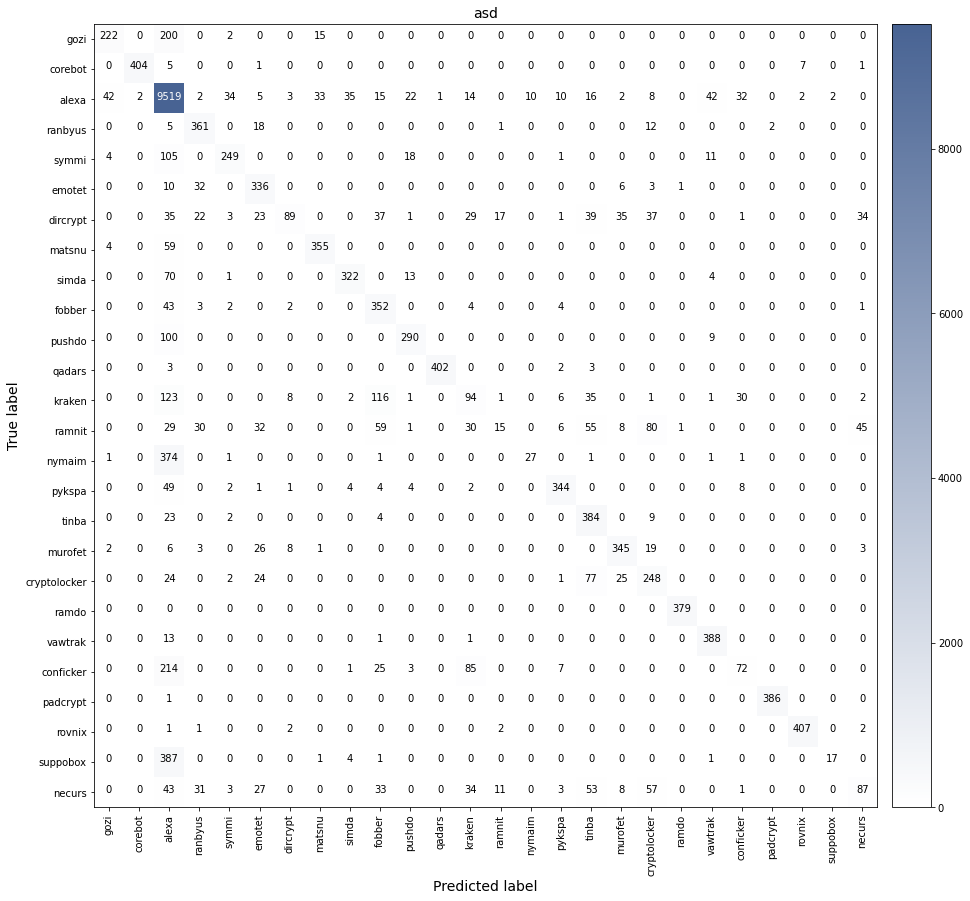

              precision    recall  f1-score   support

        gozi       0.81      0.51      0.62       439
     corebot       1.00      0.97      0.98       418
       alexa       0.83      0.97      0.89      9851
     ranbyus       0.74      0.90      0.82       399
       symmi       0.83      0.64      0.72       388
      emotet       0.68      0.87      0.76       388
    dircrypt       0.79      0.22      0.34       403
      matsnu       0.88      0.85      0.86       418
       simda       0.88      0.79      0.83       410
      fobber       0.54      0.86      0.66       411
      pushdo       0.82      0.73      0.77       399
      qadars       1.00      0.98      0.99       410
      kraken       0.32      0.22      0.26       420
      ramnit       0.32      0.04      0.07       391
      nymaim       0.73      0.07      0.12       407
      pykspa       0.89      0.82      0.86       419
       tinba       0.58      0.91      0.71       422
     murofet       0.80    

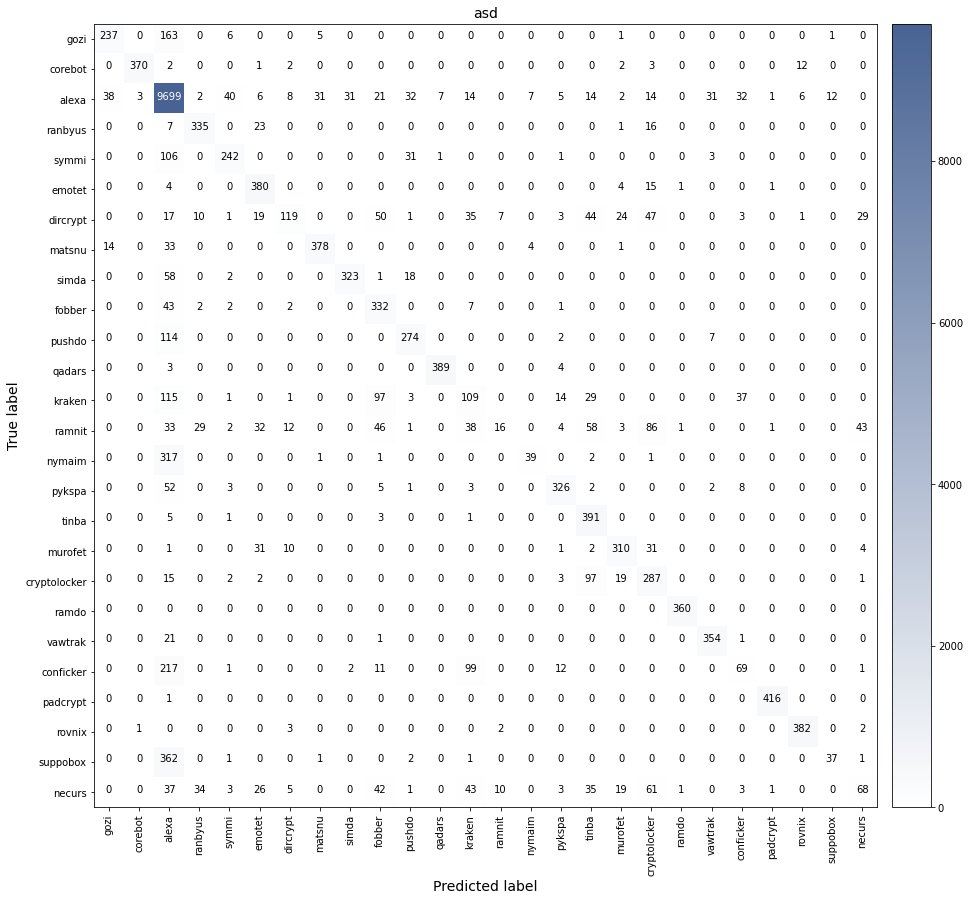

              precision    recall  f1-score   support

        gozi       0.82      0.57      0.68       413
     corebot       0.99      0.94      0.97       392
       alexa       0.85      0.96      0.90     10056
     ranbyus       0.81      0.88      0.84       382
       symmi       0.79      0.63      0.70       384
      emotet       0.73      0.94      0.82       405
    dircrypt       0.73      0.29      0.42       410
      matsnu       0.91      0.88      0.89       430
       simda       0.91      0.80      0.85       402
      fobber       0.54      0.85      0.66       389
      pushdo       0.75      0.69      0.72       397
      qadars       0.98      0.98      0.98       396
      kraken       0.31      0.27      0.29       406
      ramnit       0.46      0.04      0.07       405
      nymaim       0.78      0.11      0.19       361
      pykspa       0.86      0.81      0.83       402
       tinba       0.58      0.98      0.73       401
     murofet       0.80    

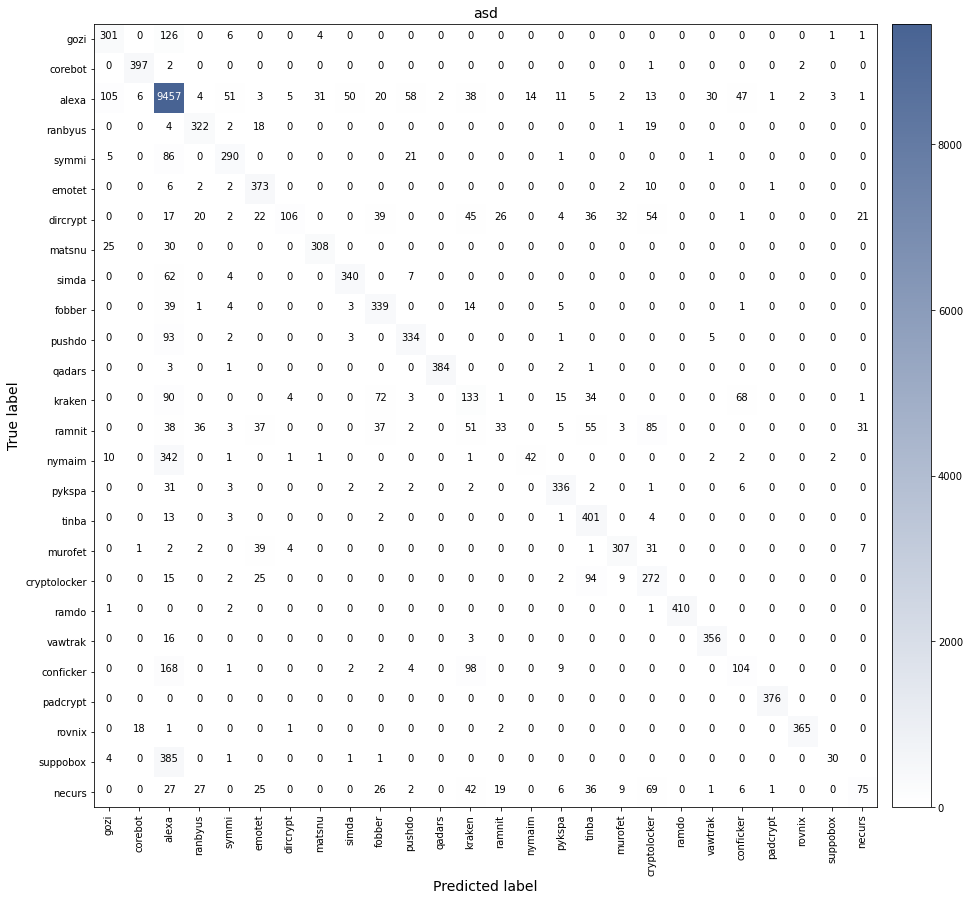

              precision    recall  f1-score   support

        gozi       0.67      0.69      0.68       439
     corebot       0.94      0.99      0.96       402
       alexa       0.86      0.95      0.90      9959
     ranbyus       0.78      0.88      0.83       366
       symmi       0.76      0.72      0.74       404
      emotet       0.69      0.94      0.80       396
    dircrypt       0.88      0.25      0.39       425
      matsnu       0.90      0.85      0.87       363
       simda       0.85      0.82      0.84       413
      fobber       0.63      0.83      0.72       406
      pushdo       0.77      0.76      0.77       438
      qadars       0.99      0.98      0.99       391
      kraken       0.31      0.32      0.31       421
      ramnit       0.41      0.08      0.13       416
      nymaim       0.75      0.10      0.18       404
      pykspa       0.84      0.87      0.86       387
       tinba       0.60      0.95      0.74       424
     murofet       0.84    

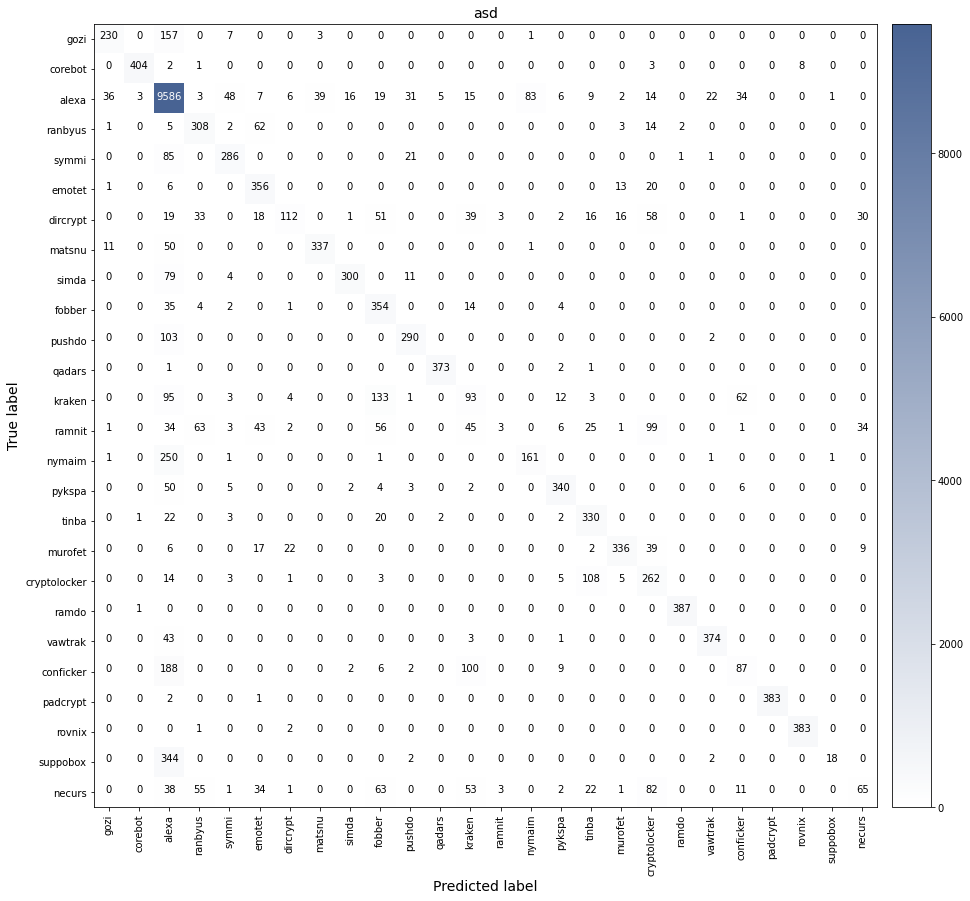

              precision    recall  f1-score   support

        gozi       0.82      0.58      0.68       398
     corebot       0.99      0.97      0.98       418
       alexa       0.85      0.96      0.90      9985
     ranbyus       0.66      0.78      0.71       397
       symmi       0.78      0.73      0.75       394
      emotet       0.66      0.90      0.76       396
    dircrypt       0.74      0.28      0.41       399
      matsnu       0.89      0.84      0.87       399
       simda       0.93      0.76      0.84       394
      fobber       0.50      0.86      0.63       414
      pushdo       0.80      0.73      0.77       395
      qadars       0.98      0.99      0.99       377
      kraken       0.26      0.23      0.24       406
      ramnit       0.33      0.01      0.01       416
      nymaim       0.65      0.39      0.49       416
      pykspa       0.87      0.83      0.85       412
       tinba       0.64      0.87      0.74       380
     murofet       0.89    

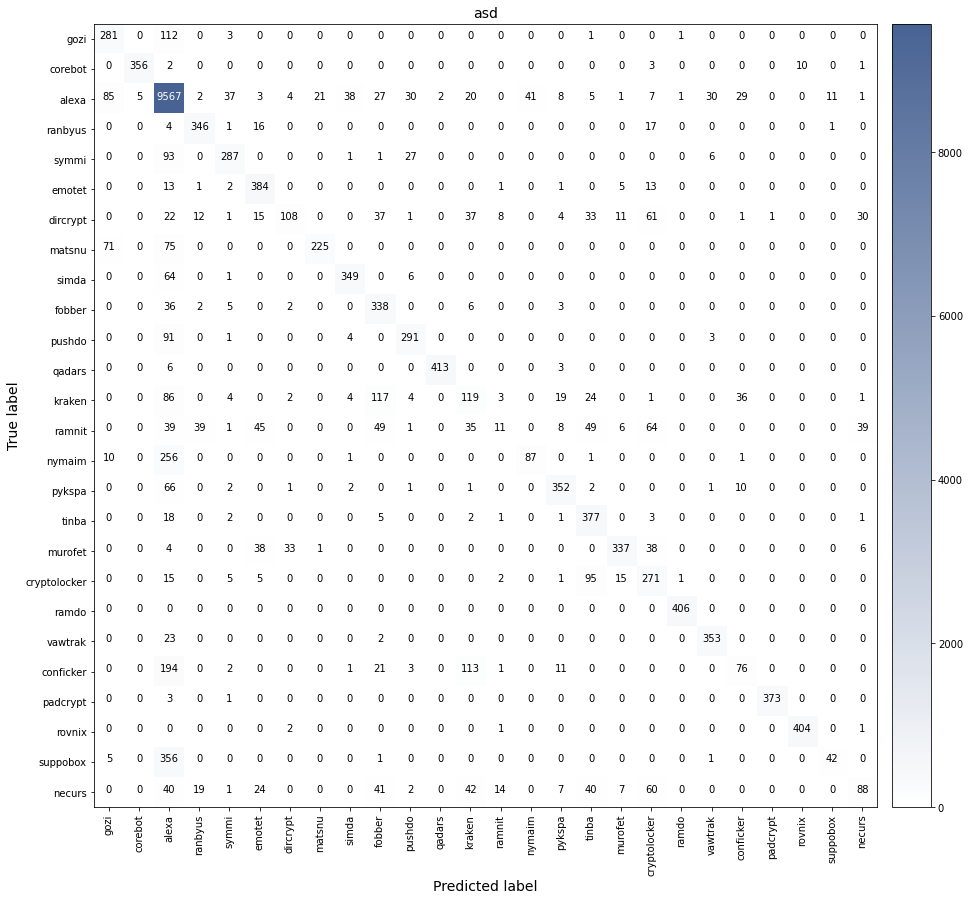

              precision    recall  f1-score   support

        gozi       0.62      0.71      0.66       398
     corebot       0.99      0.96      0.97       372
       alexa       0.86      0.96      0.90      9975
     ranbyus       0.82      0.90      0.86       385
       symmi       0.81      0.69      0.74       415
      emotet       0.72      0.91      0.81       420
    dircrypt       0.71      0.28      0.40       382
      matsnu       0.91      0.61      0.73       371
       simda       0.87      0.83      0.85       420
      fobber       0.53      0.86      0.66       392
      pushdo       0.80      0.75      0.77       390
      qadars       1.00      0.98      0.99       422
      kraken       0.32      0.28      0.30       420
      ramnit       0.26      0.03      0.05       386
      nymaim       0.68      0.24      0.36       356
      pykspa       0.84      0.80      0.82       438
       tinba       0.60      0.92      0.73       410
     murofet       0.88    

In [2]:
import numpy
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import random



def add_word_distinct_chars(string, distinct_chars):
    for char in string:
        distinct_chars.add(char)
    return distinct_chars

def find_max_len(string, max_len):
    string_length = len(string)
    if string_length > max_len:
        max_len = string_length
    return max_len

def load_data(filename):
    dataset = []
    distinct_chars = set()
    max_len = 0
    currentIndex = 0
    diverse_labels = dict()
    with open(filename, "r") as fdr:
        for line in fdr:
            line = line.strip()
            general, label, name = line.split(",")
            name = name.split(".")[0]
            if label not in diverse_labels.keys():
                diverse_labels[label] = currentIndex
                currentIndex += 1
            distinct_chars = add_word_distinct_chars(name, distinct_chars)
            max_len = find_max_len(name, max_len)
            temp_list = []
            temp_list.append(name)
            temp_list.append(label)
            dataset.append(temp_list)
    random.shuffle(dataset)
    return dataset, distinct_chars, max_len, diverse_labels

def assign_index(chars):
    features = {}
    for index, char in enumerate(chars):
        features[char] = index
    return features

def convert_dataset_and_tokenize(dataset, features, max_len):
    for item_no, example in enumerate(dataset):
        name = example[0]
        label = example[1]
        tokenized = []
        padding_needed = max_len - len(name)
        for index in range(padding_needed):
            tokenized.append(0)
        for char in name:
            token = features[char]
            tokenized.append(token)
        example[0] = tokenized
        dataset[item_no] = example
    return dataset

def split_examples_labels(dataset):
    examples = [entry[0] for entry in dataset]
    labels = [entry[1] for entry in dataset]
    return examples, labels

def convert_labels_to_int(labels, diverse_labels):
    for index, label in enumerate(labels):
        labels[index] = diverse_labels[label]
    return labels

def build_model(max_features, max_len):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length = max_len))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(26, activation = 'softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

def return_fold(examples, labels_int, num_folds, current_fold):
    interval = len(examples) // num_folds
    current_start = (current_fold - 1) * interval
    current_end = current_fold * interval
    X_test = examples[current_start:current_end]
    y_test = labels_int[current_start:current_end]
    X_train = examples[:current_start]
    y_train = labels_int[:current_start]
    X_train.extend(examples[current_end:])
    y_train.extend(labels_int[current_end:])
    return X_train, y_train, X_test, y_test

def make_predictions(model, X_test):
    y_pred = model.predict(X_test)
    y_pred = numpy.argmax(y_pred, axis = 1)
    return y_pred

def return_confusion_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

def return_classification_report(y_test, y_pred, diverse_names):
    target_names = []
    for item in diverse_names.keys():
        target_names.append(item)
    print(classification_report(y_test, y_pred, target_names = target_names))
    return None
    
if __name__ == "__main__":
    dataset, distinct_chars, max_len, diverse_labels = load_data("dga_domains_full.csv")
    dataset = dataset[0:100000]
    max_features = len(distinct_chars) + 1
    features = assign_index(distinct_chars)
    dataset = convert_dataset_and_tokenize(dataset, features, max_len)
    examples, labels = split_examples_labels(dataset)
    labels_int = convert_labels_to_int(labels, diverse_labels)

    acc_per_fold = []
    loss_per_fold = []
    number_of_folds = 5
    for fold in range(1, number_of_folds + 1):
        X_train, y_train, X_test, y_test = return_fold(examples, labels_int, number_of_folds, fold)
        model = build_model(max_features, max_len)
        print("Training for fold: ", fold)
        history = model.fit(X_train, y_train, batch_size = 128, epochs = 5, verbose = 1)
        scores = model.evaluate(X_test, y_test, verbose = 1)
        print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        y_pred = make_predictions(model, X_test)
        #print(return_confusion_matrix(y_test, y_pred))
        # Βάλαμε έναν custom confusion matrix για να φαίνεται οπτικά καλύτερο
        # το αποτέλεσμα - πριν δεν έβγαινε άκρη με την print(confusion_matrix)
        cfmatrix = confusion_matrix(y_test, y_pred)
        plot_cm(cfmatrix,'asd',diverse_labels)
        return_classification_report(y_test, y_pred, diverse_labels)

    # == Provide average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
        print('------------------------------------------------------------------------')
        print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
        print('------------------------------------------------------------------------')
        print('Average scores for all folds:')
        print(f'> Accuracy: {numpy.mean(acc_per_fold)} (+- {numpy.std(acc_per_fold)})')
        print(f'> Loss: {numpy.mean(loss_per_fold)}')
        print('------------------------------------------------------------------------')


Ο παραπάνω κώδικας επιλύει το πρόβλημα της ταξινόμησης ονομάτων DNS ως προς το αν αυτά τα ονόματα είναι καλόβουλα ή έχουν παραχθεί από Domain Generation Algorithms (DGA's). Συγκεκριμένα, ο κώδικας επιλύει ένα πρόβλημα multi-class classification, όπου τα ονόματα αντιστοιχίζονται είτε στην κατηγορία alexa, εάν είναι καλόβουλα ή στην αντίστοιχα κατηγορία malware στην οποία ανήκουν. Το μοντέλο που έχει χρησιμοποιηθεί για την ταξινόμηση των ονομάτων είναι το LSTM, ενώ για το κατάλληλο validation του μοντέλου έχει χρησιμοποιηθεί η μέθοδος K-fold cross validation με Κ = 5. Τα δεδομένα εκπαίδευσης και αξιολόγησης έχουν ληφθεί από <a href="https://github.com/chrmor/DGA_domains_dataset">εδώ</a> και χρησιμοποιούνται τα πρώτα 100000 ονόματα του αρχείου "dga_domains_full.csv". 

Μελετώντας τον κώδικα και εκτελώντας τον, να απαντήσετε στις ακόλουθες ερωτήσεις:
<ul>
<li>Γιατί το LSTM είναι κατάλληλο μοντέλο για την επίλυση του συγκεκριμένου προβλήματος;</li>
<li>Τι είναι η λίστα ονομάτων Alexa (<a href="https://en.wikipedia.org/wiki/Alexa_Internet">info</a>), ονόματα της οποίας έχουν χρησιμοποιηθεί για την κατηγορία των καλόβουλων ονομάτων;</li>
<li>Να διαλέξετε δύο οικογένειες malware από την κατηγορία dga, δηλαδή την κατηγορία με τα κακόβουλα ονόματα που αντιστοιχούν σε malware. Να αναζητήσετε τι προβλήματα δημιουργούν τα malware αυτά, π.χ. υποκλοπή τραπεζικών κωδικών, έναρξη επιθέσεων DDoS, κλπ.</li>
<li>Να περιγράψετε σύντομα τα βήματα που ακολουθεί το παραπάνω πρόγραμμα για την επίλυση του προβλήματος.</li>
<li>Ποιος είναι ο ρόλος του embedding layer και τι παραμέτρους δέχεται;</li>
<li>Να αναφέρετε λόγους για τους οποίους χρησιμοποιείται η μέθοδος K-fold cross validation.</li>
<li>Κατά τη χρήση της μεθόδου K-fold cross validation, ανά fold, να αναφέρετε πόσα examples χρησιμοποιούνται για την εκπαίδευση του μοντέλου και πόσα για το validation/testing.
<li>Δείτε <a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">εδώ</a> μεθόδους που μπορεί να χρησιμοποιούν έναντι της μεθόδου K-fold cross validation. Να αναφέρετε μερικά πλεονεκτήματα και μειονεκτήματά τους.</li>
<li>Να αναλύσετε τα κριτήρια precision, recall και F1-score που εμφανίζονται στο classification report.</li>
<li>Σε ποιες κατηγορίες πετυχαίνουμε καλύτερα αποτελέσματα και σε ποιες χειρότερα; Γιατί πιστεύετε ότι παίρνουμε αυτά τα αποτελέσματα;</li>
</ul>

### Απαντήσεις

- <font color='#486393'>Το συγκεκριμένο πρόβλημα χρησιμοποιεί ως dataset ένα σύνολο 100000 διευθύνσεων από διαφορετικές οικογένειες DGA, καθώς και υπαρκτές διευθύνσεις ιστοσελιδών (το αρχικό dataset περιλαμβάνει ακόμα περισσότερες). Οι διευθύνσεις αυτές αποτελούν στην ουσία συμβολοσειρές, οι οποίες εξ ορισμού είναι ακολουθιακά δεδομένα (συγκεκριμένα, ακολουθίες γραμμάτων). Έτσι, η εκπαίδευση ενός μοντέλου LSTM για την ταξινόμηση των διευθύνσεων αυτών σε 25 κατηγορίες είναι ενδεδειγμένη, αφού τα LSTM είναι εξαιρετικά χρήσιμα και αποδοτικά για να λαμβάνουν ως input ακολουθιακά δεδομένα, στα οποία τα χαρακτηριστικά (εδώ οι επί μέρους χαρακτήρες) είναι συσχετισμένα μεταξύ τους και ως εκ τούτου απαιτείται να διατηρείται μνήμη κατά την ανάγνωσή τους από την αρχή προς το τέλος ή/και αντίστροφα.</font>

- <font color='#486393'>Η Alexa (θυγατρική της Amazon - έκλεισε τον Μάιο του 2022) ήταν μια εταιρεία η οποία παρείχε δεδομένα σχετικά με την επισκεψιμότητα στο διαδίκτυο, κατατάξεις, καθώς και άλλες πληροφορίες που αφορούσαν περισσότερες από 30 εκατομμύρια ιστοσελίδες. Έτσι, ήταν λογικό να αποτελεί μια από τις καταλληλότερες πηγές για την εξαγωγή ενός μεγάλου όγκου από ονόματα ιστοσελίδων (τη λίστα ονομάτων Alexa), τα οποία να αντιστοιχούν σε υπαρκτές διευθύνσεις. Στο παρόν πρόβλημα, ένα υποσύνολο αυτών χρησιμοποιείται **σε αντιπαραβολή** με ένα σύνολο ονομάτων τα οποία δεν αντιστοιχούν σε πραγματικές ιστοσελίδες και χρησιμοποιούνται στα πλαίσια DNS επιθέσεων.</font>

- <font color='#486393'>**Vawtrak**: Το Vawtrak είναι λογισμικό τύπου Trojan, το οποίο υποκλέπτει κωδικούς πρόσβασης που είναι αποθηκευμένοι ή που εκπέμπονται από τη μολυσμένη συσκευή. Συγκεκριμένα, μεταδίδεται συχνά μέσω spam email και πέραν της υποκλοπής έχει και τη δυνατότητα να τραβάει στιγμιότυπα οθόνης ή και βίντεο από την κάμερα του χρήστη, εάν υπάρχει.</font>

<font color='#486393'>**PadCrypt**: Το PadCrypt είναι ransomware, δηλαδή κακόβουλο λογισμικό το οποίο προκαλεί μια δεδομένη βλάβη στο θύμα, η οποία μπορεί να επιδιορθωθεί από τους attackers μόνο εάν το θύμα συμφωνήσει να πληρώσει ένα συγκεκριμένο τίμημα, συνήθως υπό τη μορφή χρηματικού ποσού. Συγκεκριμένα, μεταδίδεται συχνά μέσω spam emails που περιλαμβάνουν επισυνημμένα αρχεία που μοιάζουν με αρχεία pdf αλλά δεν είναι. Τα αρχεία αυτά μολύνουν άλλα προϋπάρχοντα αρχεία του υπολογιστή, κωδικοποιώντας τα με τρόπο τέτοιο, ώστε να είναι ανέφικτο να ανακτηθούν χωρίς οι ίδιοι οι attackers να τα αποκωδικοποιήσουν.</font>

- <font color='#486393'>Εν συντομία, το δοθέν πρόγραμμα κατασκευάζει αρχικά ένα σύνολο χαρακτηριστικών και ένα σύνολο των αντίστοιχων κατηγοριών διαβάζοντας τις 100000 πρώτες γραμμές του αρχείου `dga_domains_full.csv`. Κατόπιν, πραγματοποιεί μια προεπεξεργασία η οποία περιλαμβάνει διάφορους μετασχηματισμούς, όπως μια απεικόνιση των χαρακτήρων κάθε συμβολοσειράς σε φυσικούς αριθμούς, ή ένα padding όπου απαιτείται προκειμένου όλα τα χαρακτηριστικά (ονόματα διευθύνσεων) να έχουν το ίδιο μήκος. Αφότου η προεπεξεργασία αυτή ολοκληρωθεί, τα δεδομένα διαμερίζονται σε folds (συγκεκριμένα 5 folds για τις default επιλογές των παραμέτρων) και σε κάθε fold μοιράζονται σε σύνολα εκπαίδευσης και αξιολόγησης. Το τελικό βήμα είναι η εκπαίδευση του μοντέλου LSTM και εν συνεχεία η αξιολόγησή του σε κάθε fold, ως προς την ακρίβεια με την οποία ταξινομεί τα δεδομένα στις διάφορες κατηγορίες, καθώς και άλλες μετρικές (π.χ. Precision, Recall, F1-Score).</font>

- <font color='#486393'>To embedding layer μετατρέπει φυσικούς αριθμούς σε dense διανύσματα συγκεκριμένου μήκους. Όπως αναφέρθηκε και παραπάνω, κατά την προεπεξεργασία των δεδομένων οι συμβολοσειρές που αποτελούν τα χαρακτηριστικά του προβλήματος μετατρέπονται σε λίστες φυσικών αριθμών, συνεπώς το embedding layer πραγματοποιεί μια τελευταία προεπεξεργασία των δεδομένων πριν αυτά εισαχθούν στο LSTM. Στη συγκεκριμένη υλοποίηση, η παράμετροι που δέχεται είναι το πλήθος των χαρακτηριστικών (δηλαδή το σύνολο των διαφορετικών χαρακτήρων που εμφανίζονται στα δεδομένα μαζί με την τιμή 0 που χρησιμοποιείται για το padding), η επιθυμητή διάσταση του output, καθώς και το μήκος των ακολουθιών (δηλαδή το μέγιστο μήκος συμβολοσειράς που εμφανίζεται στο dataset, αφού όλες οι υπόλοιπες συμβολοσειρές έχουν υποστεί padding). Πέραν αυτών υπάρχουν κι άλλες παράμετροι που παίρνει η συγκεκριμένη υλοποίηση του Keras, όπως για παράδειγμα πιθανές συναρτήσεις αρχικοποίησης και ομαλοποίησης για τον πίνακα των embeddings.</font>

- <font color='#486393'>Η μέθοδος k-fold cross validation αφενός εξασφαλίζει ότι το μοντέλο θα εκπαιδευτεί με τρόπο τέτοιο, ώστε να μην κάνει overfit σε σημαντικό βαθμό στα δεδομένα του συνόλου εκπαίδευσης, καθώς δεν υπάρχει ένα ενιαίο σύνολο εκπαίδευσης. Αφετέρου, επιτρέπει μια καλύτερη εποπτεία της πραγματικής απόδοσης του μοντέλου σε ό,τι έχει να κάνει με την αξιολόγησή του στο αντίστοιχο σύνολο, καθώς εξασφαλίζει ότι η ακρίβειά του δεν οφείλεται σε μια συγκεκριμένη κατανομή των δεδομένων σε ένα σύνολο εκπαίδευσης και ένα σύνολο αξιολόγησης, η οποία έτυχε να οδηγεί σε πολύ καλά αποτελέσματα. Ένα πολύ ενδιαφέρον σχετικό άρθρο που αφορά στην επιλογή συγκεκριμένων seeds τα οποία οδηγούν σε (φαινομενικά) βελτιωμένες αποδόσεις μοντέλων βαθιάς μάθησης είναι το [Torch.manual_seed(3407) is all you need: On the influence of random seeds in deep learning architectures for computer vision](https://arxiv.org/abs/2109.08203).</font>

- <font color='#486393'>Γενικά κατά τη χρήση της k-fold cross validation, εάν το δείγμα αποτελείται από $N$ συνολικά δειγματικά σημεία, τότε τα $(k-1)N/k$ εξ αυτών αξιοποιούνται για την εκπαίδευση του μοντέλου σε κάθε fold, ενώ τα υπόλοιπα $N/k$ αξιοποιούνται για την αξιολόγησή του. Για τα default νούμερα της υλοποίησης του παρόντος notebook, όπου $k=5$ και $Ν = 100000$, σε κάθε fold χρησιμοποιούνται 80000 σημεία για την εκπαίδευση και 20000 σημεία για την αξιολόγηση του μοντέλου.</font>

- <font color='#486393'>Γενικά, υπάρχουν δύο ευρύτερες κατηγορίες του cross-validation: η exhaustive και η non exhaustive, όπου στις μεν το cross-validation γίνεται με όλους τους δυνατούς τρόπους, σε αντίθεση με τις δεν. Η χαρακτηριστικότερη περίπτωση exhaustive cross-validation είναι η leave-p-out cross-validation, όπου τα $p$ από τα $n$ συνολικά διαθέσιμα δεδομένα αξιοποιούνται για το validation του μοντέλου, με τα υπόλοιπα $n-p$ να αξιοποιούνται για την εκπαίδευση έτσι, ώστε να εκπαιδευτούν μοντέλα με όλους τους δυνατούς συνδυασμούς. Προφανώς, το σημαντικότερο μειονέκτημα της μεθόδου αυτής είναι ότι όσο υψηλότερο είναι το $p$, τόσο περισσότερα είναι τα μοντέλα που πρέπει να εκπαιδευτούν. Για παράδειγμα, με $p = 50$ και $n = 450$, μέσω της μεθόδου αυτής πρέπει να εκπαιδευτούν περίπου $9\cdot 10^{63}$ μοντέλα. Ειδική περίπτωση αυτής της μεθόδου είναι η leave-one-out cross-validation, δηλαδή το όριο $p = 1$, όπου απαιτείται η εκπαίδευση $n$ μοντέλων.</font>

<font color='#486393'>Από την άλλη, στην περίπτωση των μεθόδων non exhaustive cross-validation (στις οποίες ανήκει και η $k$-fold cross-validation που χρησιμοποιήθηκε και στο παρόν notebook), υπάρχει η λεγόμενη μέθοδος holdout, όπου τα δεδομένα ανατίθενται με τυχαίο τρόπο στο σύνολο εκπαίδευσης και στο σύνολο επικύρωσης/αξιολόγησης και ένα μόνο μοντέλο εκπαιδεύεται χρησιμοποιώντας τα. Επειδή όμως αυτή πρακτικά αντιστοιχεί στη συνηθισμένη πρακτική εκπαίδευσης μοντέλων, θεωρούμε συχνά πως καταχρηστικά ανήκει στο σύνολο των μεθόδων cross-validation. Από την άλλη, υπάρχει η μέθοδος repeated random sub-sampling validation, όπου πολλά σύνολα εκπαίδευσης και επικύρωσης/αξιολόγησης κατασκευάζονται με τυχαίο τρόπο και η τελική επίδοση του μοντέλου αξιολογείται ως ο μέσος όρος της επίδοσής του σε όλα τα splits. Το πλεονέκτημα αυτής της μεθόδου έναντι της k-fold είναι πως η αναλογία των μεγεθών των συνόλων εκπαίδευσης και επικύρωσης/αξιολόγησης δεν εξαρτάται από το πλήθος των μοντέλων που εκπαιδεύονται (π.χ. στην k-fold εάν $k = 5$, τότε η αναλογία αυτή ισούται με 5). Από την άλλη, μειονεκτεί ως προς το ότι ενδέχεται κάποιες παρατηρήσεις να μην εμφανιστούν ποτέ στο σύνολο επικύρωσης/αξιολόγησης.</font>

- <font color='#486393'>Η ακρίβεια (accuracy) είναι πολλές φορές ανεπαρκής, ειδικά σε προβλήματα ταξινόμησης όπου η συχνότητα εμφάνισης των επί μέρους κατηγοριών δεν είναι ομοιόμορφη, αλλά διαφέρει από κατηγορία σε κατηγορία. Χαρακτηριστικό παράδειγμα σε αυτό αποτελεί η ανίχνευση κάποιας σπάνιας ασθένειας, δηλαδή ένα δυαδικό πρόβλημα ταξινόμησης όπου η μία κατηγορία (μη ασθενής) είναι πολύ συχνότερη της άλλης (ασθενής). Στην περίπτωση αυτή, ένας τετριμμένος ταξινομητής ο οποίος έχει εκπαιδευτεί για να αποφαίνεται πάντοτε αρνητικά σχετικά με την ύπαρξη της ασθένειας θα εμφανίζει ακρίβεια τόση, όση είναι και η αντίστοιχη πιθανότητα βάσει βιβλιογραφίας κάποιος να μην πάσχει από την ασθένεια αυτή (θα μπορούσε να είναι μεγαλύτερη και από 99%). Παρ' όλα αυτά, ο ταξινομητής αυτός θα έχει μηδενική χρήση ως διαγνωστικό εργαλείο, αφού το σημαντικό σε αυτές τις περιπτώσεις είναι η έγκαιρη διάγνωση των πραγματικά ασθενών, ώστε να μπορούν να προβούν εγκαίρως σε διαδικασίες αντιμετώπισης και θεραπείας.</font>
    
<font color='#486393'>Για το λόγο αυτό, στις περιπτώσεις αυτές είθισται να χρησιμοποιείται το Recall ως μέτρο αξιολόγησης, το οποίο ορίζεται ως</font>
    
<font color='#486393'>$$ \text{Recall} = \frac{TP}{TP+FN},$$</font>
    
<font color='#486393'>όπου TP είναι το πλήθος των true positives και FN το πλήθος των false negatives. Υπάρχουν, αντίστοιχα, προβλήματα όπου για παρεμφερείς λόγους χρησιμοποιείται το Precision με πρόσθετη βαρύτητα (για παράδειγμα κατά την κατασκευή αλγορίθμων που προτείνουν σε χρήστες videos τα οποία ταιριάζουν στα γούστα τους), το οποίο ορίζεται ως</font>
    
<font color='#486393'>$$ \text{Precision} = \frac{TP}{TP+FP},$$</font>
    
<font color='#486393'>όπου FP είναι το πλήθος των false positives. Τέλος, υπάρχουν προβλήματα όπου ο συνδυασμός των Recall και Precision είναι σημαντικός και για το λόγο αυτό χρησιμοποιείται το F1-Score, το οποίο αποτελεί τον αρμονικό τους μέσο, δηλαδή</font>

<font color='#486393'>$$\text{F1-Score} = 2\cdot\frac{\text{Precision}\cdot \text{Recall}}{\text{Precision} + \text{Recall}}.$$</font>

- <font color='#486393'>Καταρχάς, αξίζει να σημειωθεί πως τα αποτελέσματα σε όλα τα folds είναι όμοια, γεγονός που υποδεικνύει τη συνέπεια του μοντέλου και το γεγονός ότι δεν έχει κάνει overfit. Από εκεί και πέρα, υπάρχουν κατηγορίες DGAs όπου τα αποτελέσματα είναι πάρα πολύ ικανοποιητικά (όπως για παράδειγμα στις κατηγορίες qadars, padcrypt, rovnix), καθώς και κατηγορίες DGAs όπου η ακρίβεια (καθώς και οι άλλες μετρικές) δεν είναι τόσο καλές (όπως για παράδειγμα στις κατηγορίες ramnit, suppobox, kraken, conficker).</font>
    
<font color='#486393'>Στις περιπτώσεις όπου η ακρίβεια δεν είναι ικανοποιητική, υπάρχουν διάφορες ερμηνείες. Καταρχάς, υπάρχουν κατηγορίες όπως η ramnit, όπου το μοντέλο αποτυγχάνει να μάθει τα χαρακτηριστικά που τη διακρίνουν από τις άλλες και έτσι ταξινομεί λάθος τις περισσότερες από τις παρατηρήσεις που την αφορούν, χωρίς όμως να προτιμά κατά πολύ μια άλλη κατηγορία στη θέση της. Πρόσθετα, υπάρχουν κατηγορίες όπως η suppobox, όπου προτιμάται κατά κόρον η λανθασμένη ταξινόμηση των δεδομένων τους ως δεδομένα της κατηγορίας alexa. Αυτό οφείλεται στο γεγονός πως το dataset είναι εξαιρετικά imbalanced, όπως γίνεται εμφανές και από το support της κατηγορίας alexa στα παραπάνω classification reports, με αποτέλεσμα το μοντέλο να εμφανίζει μια τάση να ταξινομήσει στην πολυπληθέστερη κατηγορία. Τέλος, υπάρχουν ζεύγη κατηγοριών όπως οι kraken και conficker, όπου οι αντίστοιχες παρατηρήσεις μοιάζουν σημαντικά, με αποτέλεσμα το μοντέλο να αποτυγχάνει να τις διαχωρίσει μεταξύ τους.</font>